In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EastWest_Airlines.csv to EastWest_Airlines.csv


In [4]:
airlines=pd.read_csv('EastWest_Airlines.csv')

In [5]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EXPLORATORY DATA ANALYSIS

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
#Renaming the columns
airlines=airlines.rename({'ID#':'ID','Award?':'Award'},axis=1)

In [10]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
airlines.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


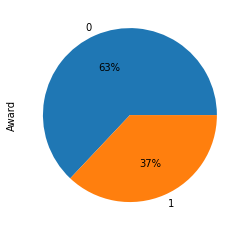

In [12]:
#Checking for previously awarded miles ratio
airlines['Award'].value_counts().plot(kind = 'pie', autopct='%2.0f%%')

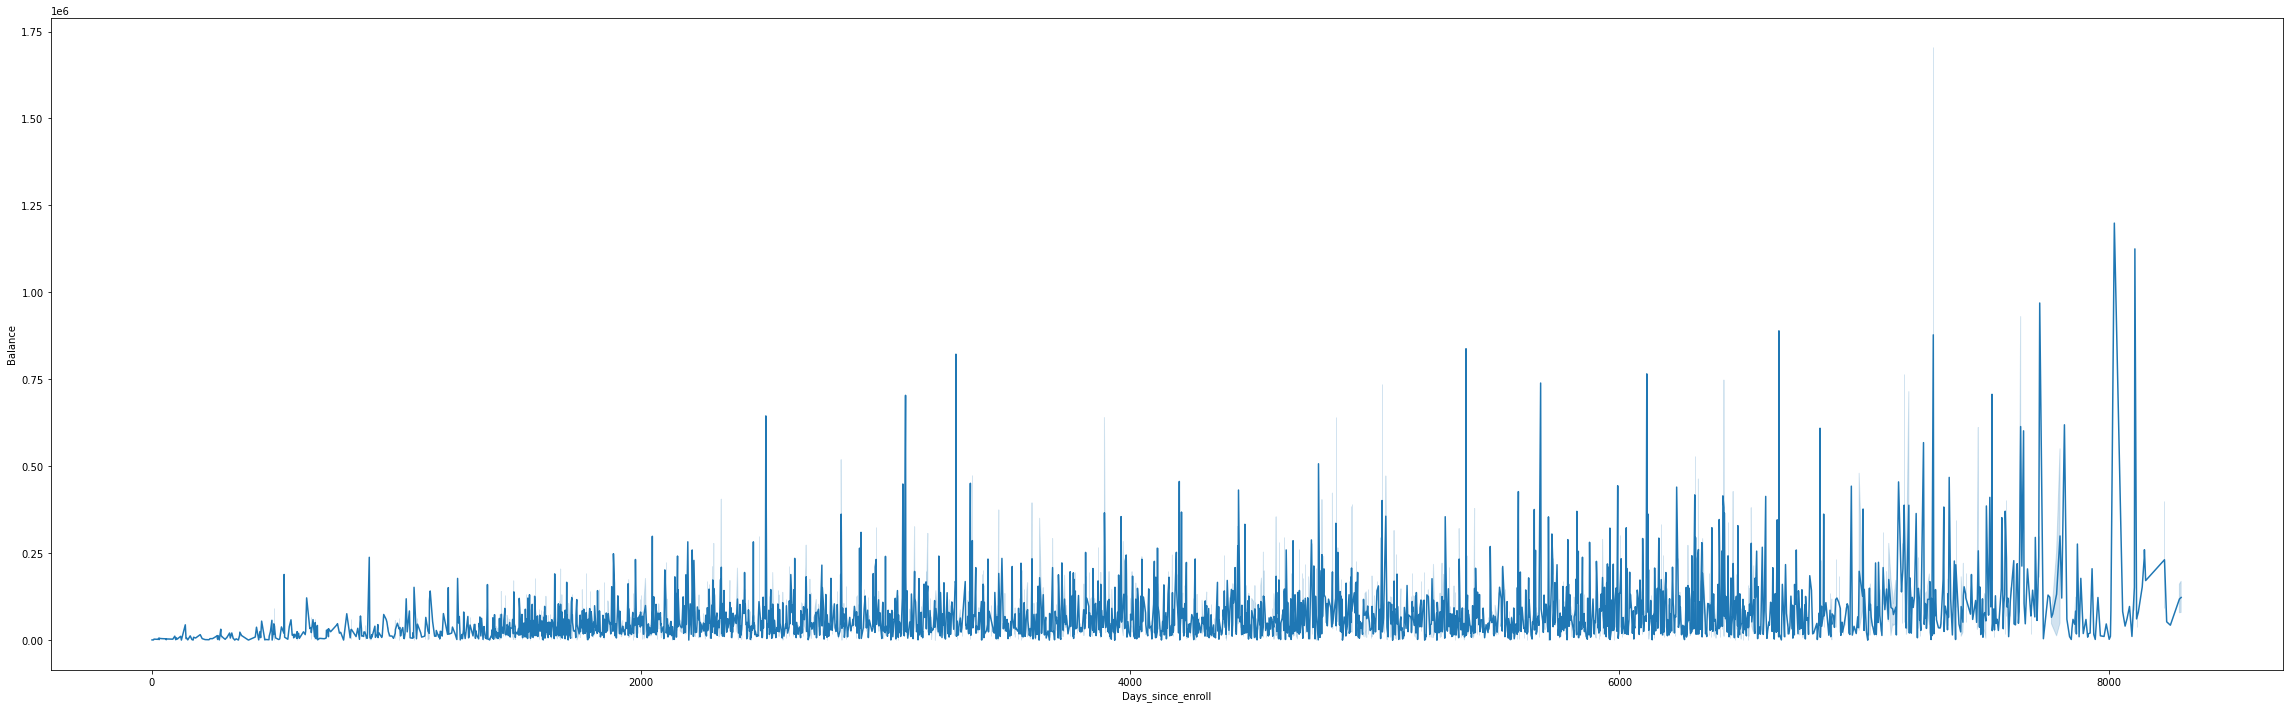

In [13]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airlines)

### Agglomerative Clustering

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
data = airlines.drop(['ID'], axis = 1)

In [16]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
# Normalizing Data
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [18]:
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


In [21]:
print('\n')

In [22]:
scaler2_df = scaler1.fit_transform(data)
print(scaler2_df)


[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

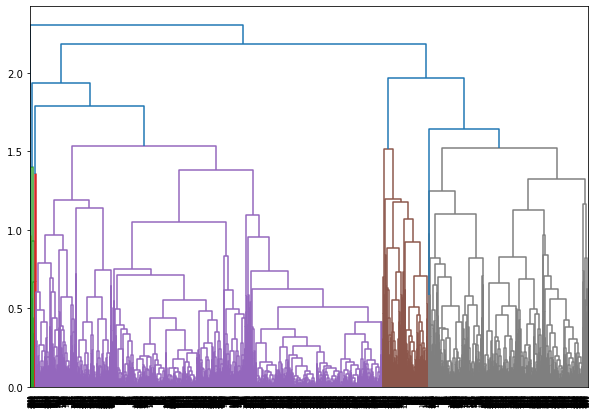

In [24]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

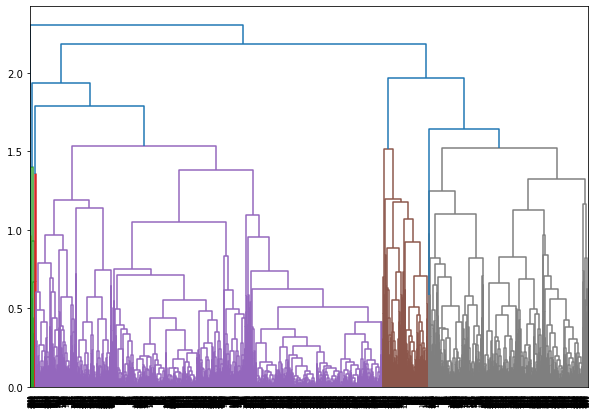

In [25]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [26]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [27]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [28]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
airlines['clustersid_s1']=H_clusters.labels_
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


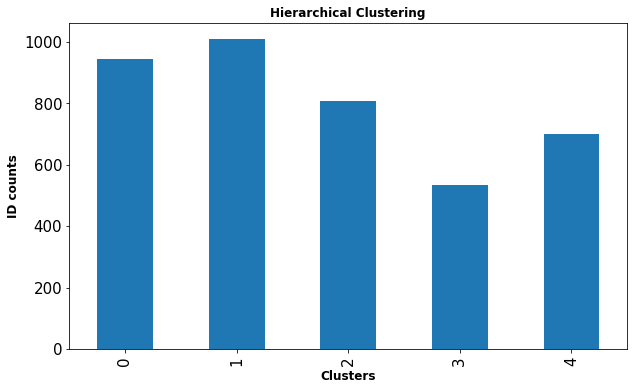

In [29]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [30]:
airlines.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,1567.278932,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,3390.846924,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [31]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [32]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [33]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [34]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
airlines['clustersid_s2']=H_clusters.labels_
# data1['clustersid_s2']=H_clusters.labels_

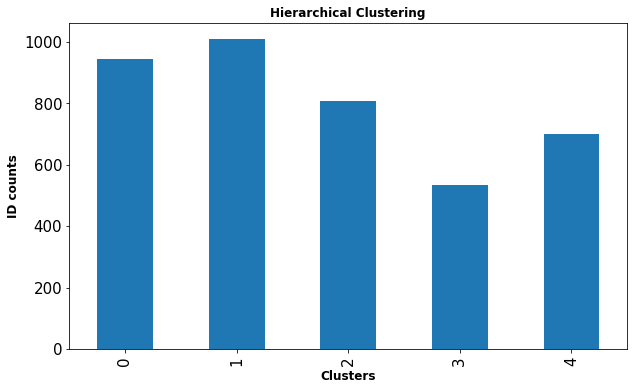

In [35]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [36]:
airlines.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.0
1,1,1567.278932,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,2.0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,3.0
4,4,3390.846924,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.0


In [37]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [38]:
sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3762586351398372

## K-MEANS CLUSTERING

In [42]:
data1=data.copy()

In [43]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [44]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [45]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


In [46]:
print('\n')

In [47]:
scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [48]:
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

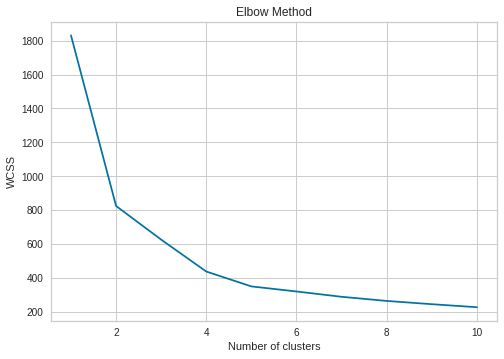

In [49]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

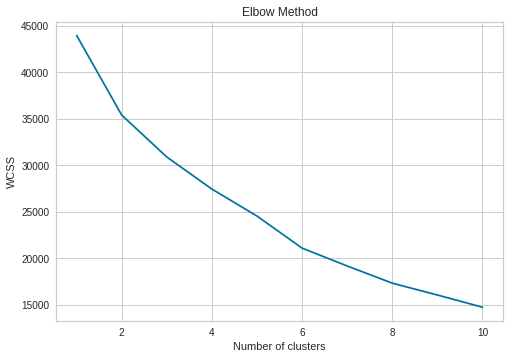

In [50]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
#From above two Scree plots, optimum number of clusters can be selected equal to 2

In [60]:
#Build Cluster algorithm

In [61]:
# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(2, random_state=42)
clusters_new1.fit(scaler1_df)

KMeans(n_clusters=2, random_state=42)

In [62]:
sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.535930510919477


In [63]:
# Using data normalized by StandardScaler
clusters_new2 = KMeans(2, random_state=42)
clusters_new2.fit(scaler2_df)

KMeans(n_clusters=2, random_state=42)

In [64]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [65]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    2518
0    1481
Name: clusterid_Kmeans, dtype: int64

In [67]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,1,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


## DBSCAN 

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.84374246 0.         1.        ]
 [0.01128788 0.         0.         ... 0.83988425 0.         1.        ]
 [0.02425685 0.         0.         ... 0.84784181 0.         1.        ]
 ...
 [0.0431695  0.         0.5        ... 0.16879672 1.         0.        ]
 [0.03220189 0.         0.         ... 0.16867615 0.         1.        ]
 [0.00176908 0.         0.         ... 0.16831444 0.         1.        ]]


In [70]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [71]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [72]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.6422212342897226

In [90]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_Kmeans,clusterid_DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [74]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

DBSCAN(eps=0.8, min_samples=12)

In [75]:
y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64


In [76]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.6422212342897226


In [77]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

DBSCAN(eps=0.6, min_samples=12)

In [78]:
y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

 0    2516
 1    1474
-1       9
Name: clusterid_DBSCAN, dtype: int64


In [79]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.6256777980802993


In [80]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

DBSCAN(min_samples=12)

In [81]:
y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

 0    2486
 1    1450
-1      47
 2      16
Name: clusterid_DBSCAN, dtype: int64


In [82]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.3530271507217349


In [83]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

DBSCAN(eps=0.55, min_samples=12)

In [84]:
y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

 0    2516
 1    1471
-1      12
Name: clusterid_DBSCAN, dtype: int64


In [85]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.6202483804359251


In [86]:
# ### When we have value of epsilon = 0.55, we are getting 6 clusters with data less than 50% in one cluster and also, silhouette score is more as compared to other dbscan models.
# ### -1 shows the noisy data points

In [87]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_

In [88]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_Kmeans,clusterid_DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [92]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,215995.166667,199.000000,2.166667,1.333333,2.916667,94007.333333,32.666667,5471.000000,13.583333,3790.583333,0.833333,0.166667
1,0,59797.503180,87.672099,1.705882,1.013911,1.005962,10183.408585,9.141892,226.472178,0.653021,3821.937202,0.000000,1.000000
2,1,96049.795377,240.205982,2.663494,1.012916,1.007478,28424.674371,15.637661,818.699524,2.506458,4628.577838,1.000000,0.000000


# Inferences
# 0 Loyal Customer-  
#                    oldest customer with high balance and bonus miles.
#                    They use the frequent flyer credit card very often. 

# 1 Frequent travellers- 
#                     old customer having high balance and bonus miles & have high number of miles Travelled  

# 2 Not so Frequent customer - 
#                     This cluster have highest no of customers who don’t travel as frequently compared to the other two cluster 
#                     and have the least flight miles eligible for award travel.